1. What is the fundamental idea behind ensemble techniques? How does 
bagging differ from boosting in terms of approach and objective?
    - The fundamental idea behind ensemble techniques is to combine multiple base models (weak learners) to form a stronger and more robust model. This reduces variance, bias, and improves prediction accuracy.

        Bagging (Bootstrap Aggregating): Builds several independent models on random subsets of the training data and averages their predictions. It mainly reduces variance.

        Boosting: Builds models sequentially where each model tries to correct the errors of the previous one. It focuses on reducing bias by giving higher weights to misclassified samples.

2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
    - Random Forest reduces overfitting by combining multiple decision trees trained on random subsets of data and features.

        Key Hyperparameters:

        n_estimators: Number of trees in the forest. Increasing it stabilizes results and reduces variance.

        max_features: Controls how many features each tree can consider for splitting, increasing model diversity and reducing correlation among trees.

3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
    - Stacking combines predictions from multiple base models (level-0) using a meta-model (level-1) that learns the best way to combine them.

        Difference: Bagging and boosting combine outputs using averaging or weighted voting, while stacking uses another learning algorithm for final prediction.

        Example: Combining Logistic Regression, Random Forest, and SVM as base models, with a Gradient Boosting model as the meta-learner for better generalization.

4. What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set? 
    - The Out-of-Bag (OOB) Score is an internal validation score computed using the samples not included in the bootstrap subset for a particular tree.

        Each tree is trained on a bootstrap sample (~63% of data), and the remaining 37% OOB samples act as validation data.

        It provides an unbiased estimate of model performance without a separate validation set.

5. Compare AdaBoost and Gradient Boosting in terms of: 
        ● How they handle errors from weak learners 
        ● Weight adjustment mechanism 
        ● Typical use cases.

- Error Handling
Adjusts weights of misclassified samples to focus on difficult ones.
Fits new models to minimize the residual errors (loss function gradients).

Weight Mechanism
Instance weights updated iteratively.
Learners are added to correct residuals.

Use Cases
Simple datasets, interpretable models.
Complex nonlinear relationships, high accuracy tasks.

6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
    - CatBoost performs well on categorical data because it uses ordered target statistics and permutation-driven encoding instead of one-hot encoding.

        It replaces categories with numerical values calculated from target mean statistics, preventing target leakage.

        This allows efficient handling of categorical features with minimal preprocessing.

7. KNN Classifier Assignment: Wine Dataset Analysis with 
Optimization

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)
print("🔹Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("🔹With Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


🔹Without Scaling:
Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

🔹With Scaling:
Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Params: {'metric': 'manhattan', 'n_neighbors': 1}
Best Score: 0.9753333333333334


8. PCA + KNN with Variance Analysis and Visualization Task

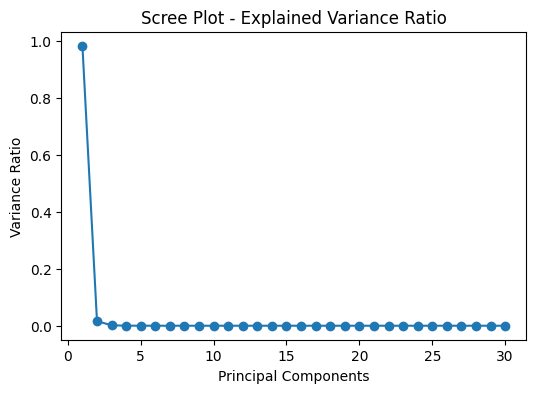

Accuracy on Original: 0.9590643274853801
Accuracy on PCA (95% variance): 0.9532163742690059


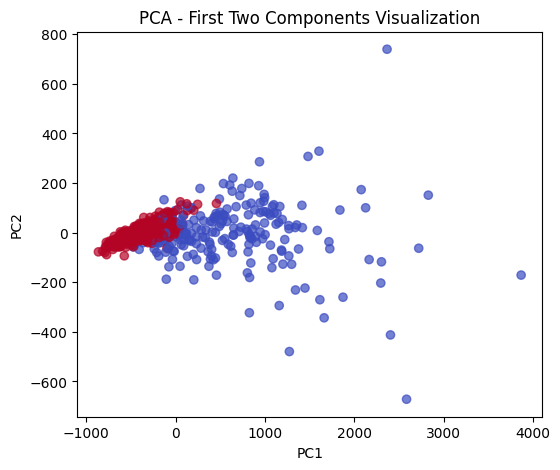

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

pca_full = PCA().fit(X)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_, marker='o')
plt.title("Scree Plot - Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.show()

pca_95 = PCA(0.95)
X_pca_95 = pca_95.fit_transform(X)

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca_95, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Accuracy on Original:", accuracy_score(y_test, knn.predict(X_test)))

knn.fit(X_train_pca, y_train)
print("Accuracy on PCA (95% variance):", accuracy_score(y_test, knn.predict(X_test_pca)))

plt.figure(figsize=(6,5))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components Visualization")
plt.show()


9. KNN Regressor with Distance Metrics and K-Value Analysis.

Euclidean MSE: 3103.699882259301
Manhattan MSE: 3675.2741541435325


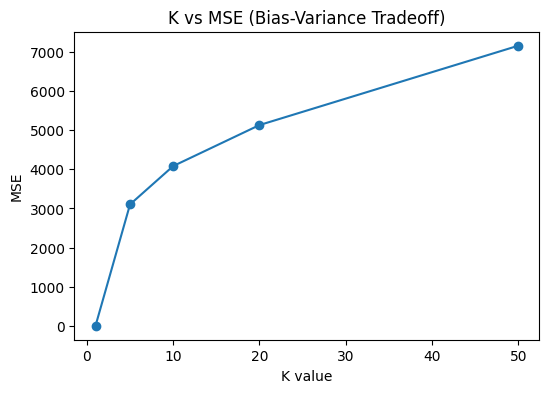

In [6]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    print(f"{metric.capitalize()} MSE:", mean_squared_error(y, y_pred))

K_values = [1, 5, 10, 20, 50]
mse_values = []

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    mse_values.append(mean_squared_error(y, knn.predict(X)))

plt.figure(figsize=(6,4))
plt.plot(K_values, mse_values, marker='o')
plt.title("K vs MSE (Bias-Variance Tradeoff)")
plt.xlabel("K value")
plt.ylabel("MSE")
plt.show()


10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data.

In [7]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import time

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for algo in ['brute', 'kd_tree', 'ball_tree']:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print(f"{algo.upper()} → Accuracy: {acc:.4f} | Time: {time.time()-start:.4f}s")


BRUTE → Accuracy: 0.6883 | Time: 0.0108s
KD_TREE → Accuracy: 0.6883 | Time: 0.0067s
BALL_TREE → Accuracy: 0.6883 | Time: 0.0094s
